# Service request data analysis of New York City 311 calls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

1 . Reading 311 NYC service request dataset using pandas.

In [2]:
nyc=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
nyc.shape

(300698, 53)

In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [5]:
# Converting 'Created Date' & 'Closed Date' to datetime data type.

nyc['Closed Date']=nyc['Closed Date'].astype('datetime64')
nyc['Created Date']= nyc['Created Date'].astype('datetime64')

In [6]:
nyc[['Closed Date','Created Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Closed Date   298534 non-null  datetime64[ns]
 1   Created Date  300698 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.6 MB


In [7]:
# creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

nyc['Request_Closing_Time']=(nyc['Closed Date']-nyc['Created Date']).dt.total_seconds()

In [8]:
nyc.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0


3. major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

In [9]:
# 1. Unique complaints registered in different cities

print(f"The number of uniquely registered complaints are {nyc['Complaint Type'].nunique()}.")
nyc['Complaint Type'].unique()


The number of uniquely registered complaints are 24.


array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [10]:
# 2. Complaints count .

complaints_count=nyc['Complaint Type'].value_counts()
print("Below are the Individual complaints count in various cities ")
complaints_count

Below are the Individual complaints count in various cities 


Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Unique Complaint Insights'}>

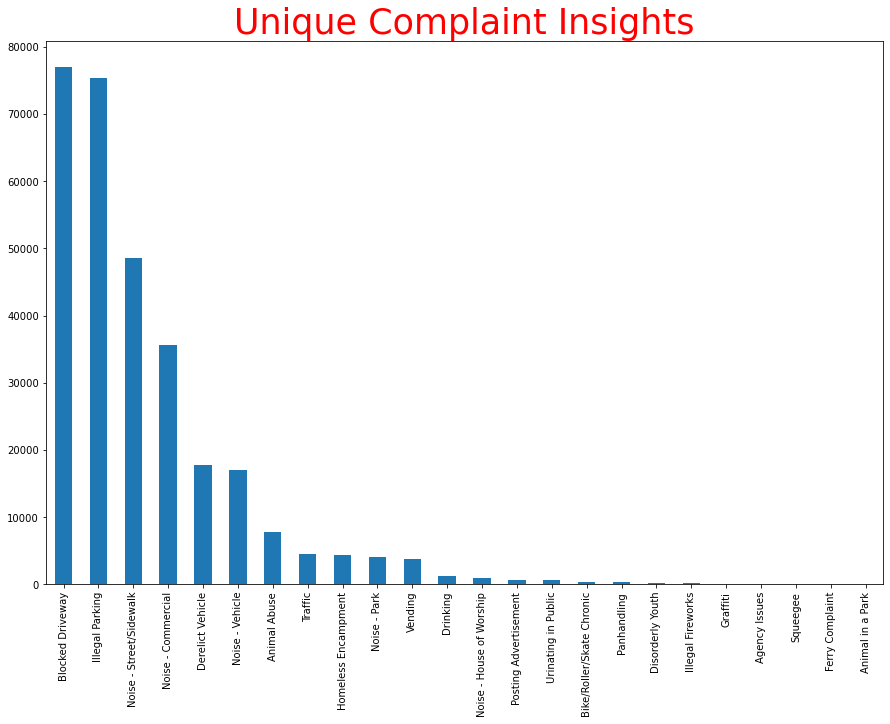

In [11]:
#3. Unique Complaints count insight in visual form. Here plotting a bar graph.

plt.figure(figsize=(15,10))
plt.title('Unique Complaint Insights',fontsize=35,color='r')
complaints_count.plot(kind='bar')

In [12]:
# 4. Top 10 Complaints Type.

nyc['Complaint Type'].value_counts()[0:10]

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [13]:
#5 Finding the unique cities from where multiple complaints are coming.
print(f"The number of unique City Count is {nyc['City'].nunique()}")
nyc['City'].unique()

The number of unique City Count is 53


array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [14]:
#6 checking whether City column having null value.
nyc['City'].isnull().sum()

2614

In [15]:
# From above it is found that , City column is having Null value.Hence filling a "unknown city" string value to the null values.
nyc['City'].fillna('Unknown City',inplace=True)

In [16]:
nyc['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [17]:
# 7. Grouping the city wise complaints Types

nyc.groupby(['City','Complaint Type']).size()

City      Complaint Type         
ARVERNE   Animal Abuse                38
          Blocked Driveway            35
          Derelict Vehicle            27
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            11
          Derelict Vehicle             2
          Illegal Parking            100
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 782, dtype: int64

In [18]:
# 8. complaints per city using crosstab from pandas.

complaints_per_city=pd.crosstab(index=nyc['City'],columns=nyc['Complaint Type'])


In [19]:
complaints_per_city

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,38,0,0,35,27,2,1,0,1,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,0,125,0,15,2618,351,3,35,0,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,0,37,0,0,377,198,1,1,0,3,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,0,7,0,1,95,89,2,1,0,0,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1415,0,20,12755,1953,63,188,0,9,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,0,2394,0,111,28148,5181,72,257,0,43,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,0,11,0,0,147,115,0,0,0,0,...,2,0,25,77,0,0,0,6,0,0


Text(0.5, 1.0, 'Complaints per city')

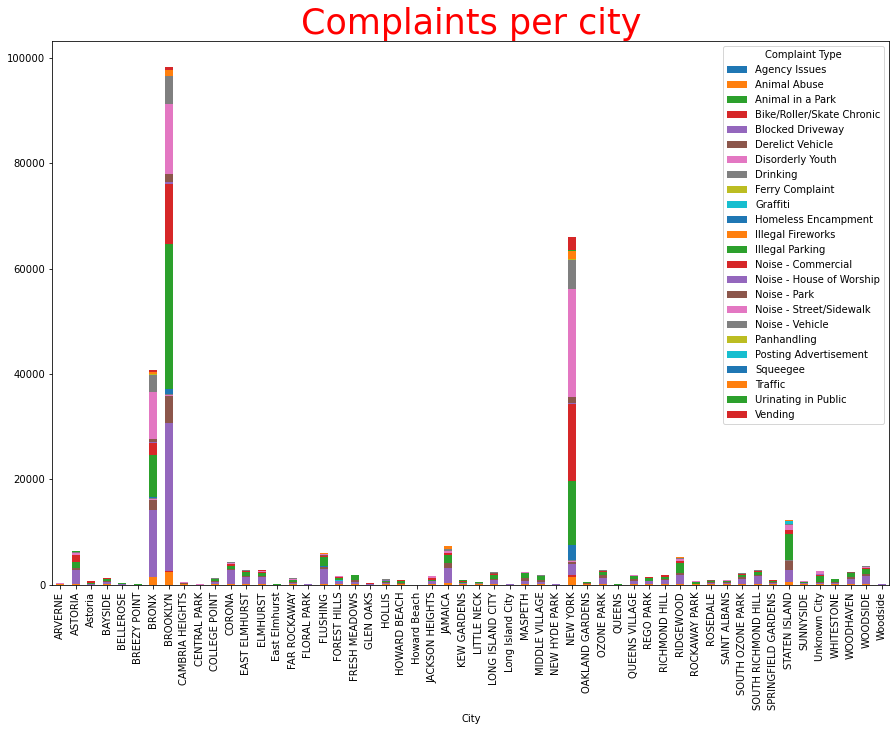

In [20]:
# 9. City wise complaints visual insight.

complaints_per_city.plot(kind='bar',figsize=(15,10),stacked=True)
plt.title('Complaints per city',fontsize=35,color='r')

In [21]:
#From above graph , it is observed that Brooklyn is having maximum complaints.
nyc_city_Brooklyn=nyc[nyc['City']=='BROOKLYN']
nyc_city_Brooklyn.shape

(98307, 54)

In [22]:
# 10. Brooklyn City's individual complaints Type and it's count.

Brooklyn_complaints_count=nyc_city_Brooklyn['Complaint Type'].value_counts()
print(Brooklyn_complaints_count)

Blocked Driveway             28148
Illegal Parking              27462
Noise - Street/Sidewalk      13356
Noise - Commercial           11463
Derelict Vehicle              5181
Noise - Vehicle               5177
Animal Abuse                  2394
Noise - Park                  1555
Traffic                       1085
Homeless Encampment            857
Vending                        515
Noise - House of Worship       340
Drinking                       257
Urinating in Public            136
Bike/Roller/Skate Chronic      111
Disorderly Youth                72
Illegal Fireworks               61
Panhandling                     49
Posting Advertisement           45
Graffiti                        43
Name: Complaint Type, dtype: int64


Text(0.5, 1.0, 'BROOKLYN CITY COMPLAINT INSIGHT')

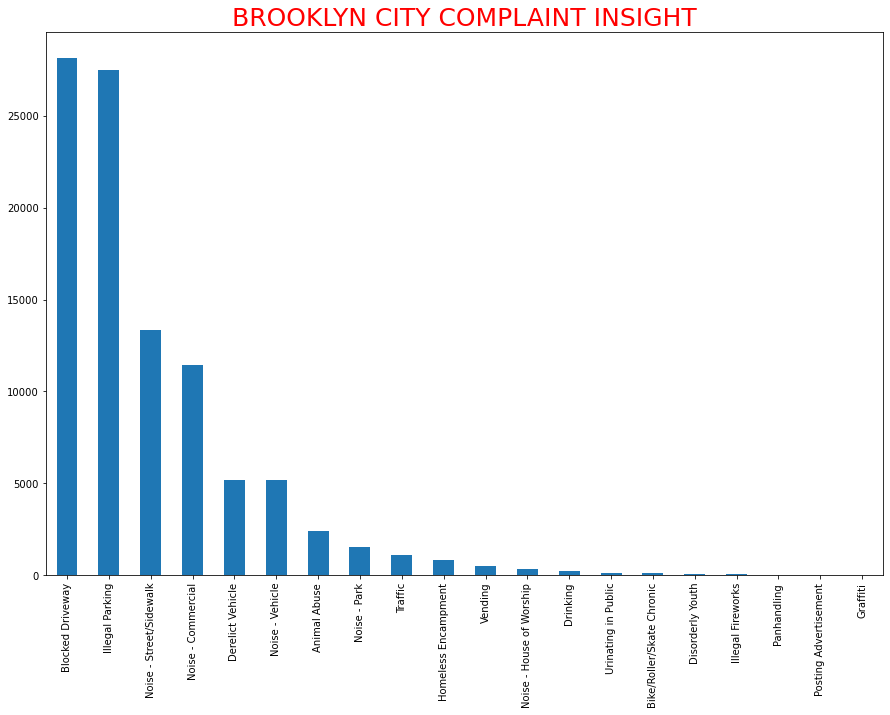

In [23]:
#  Brooklyn City's individual complaints Type Visual Insight using bar graph.

Brooklyn_complaints_count.plot(kind='bar',figsize=(15,10))
plt.title("BROOKLYN CITY COMPLAINT INSIGHT",fontsize=25,color='r')

4. complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [24]:
# Looking for null value in Request_Closing_Time column. 

nyc['Request_Closing_Time'].isnull().sum()

2164

In [25]:
# As null value foud in Request_Closing_Time column, filling 0 inplace of Null value.
nyc['Request_Closing_Time'].fillna(0,inplace=True)

In [26]:
nyc['Request_Closing_Time'].isnull().sum()

0

In [27]:
nyc_avg_response_time=nyc.groupby(['City','Complaint Type']).Request_Closing_Time.mean()

In [28]:
nyc_avg_response_time.head(50)

City     Complaint Type           
ARVERNE  Animal Abuse                  7753.052632
         Blocked Driveway              9093.485714
         Derelict Vehicle             10685.592593
         Disorderly Youth             12928.500000
         Drinking                       859.000000
         Graffiti                      5520.000000
         Homeless Encampment           6533.250000
         Illegal Parking               8338.913793
         Noise - Commercial            8234.000000
         Noise - House of Worship      5623.909091
         Noise - Park                  4620.000000
         Noise - Street/Sidewalk       7172.620690
         Noise - Vehicle               6695.571429
         Panhandling                   3720.000000
         Urinating in Public           2491.000000
         Vending                       1740.000000
ASTORIA  Animal Abuse                 18000.608000
         Bike/Roller/Skate Chronic     6261.533333
         Blocked Driveway             17338.024

In [29]:
# Average response time accross complaints type
nyc_avg_responsetime=nyc.groupby(['Complaint Type']).Request_Closing_Time.mean().sort_values(ascending=True)
round(nyc_avg_responsetime,3)*10

Complaint Type
Ferry Complaint                     0.00
Posting Advertisement           70910.06
Illegal Fireworks               99401.01
Noise - Commercial             112246.65
Noise - House of Worship       114711.78
Noise - Park                   122178.82
Noise - Street/Sidewalk        122660.52
Traffic                        124097.32
Disorderly Youth               128109.02
Noise - Vehicle                128825.60
Urinating in Public            130559.92
Bike/Roller/Skate Chronic      134640.00
Drinking                       138482.91
Vending                        144235.03
Squeegee                       145642.50
Panhandling                    156394.10
Homeless Encampment            157160.53
Illegal Parking                160258.94
Blocked Driveway               170154.22
Animal Abuse                   187435.49
Agency Issues                  189371.67
Graffiti                       257445.04
Derelict Vehicle               263163.88
Animal in a Park             12126050.00
N

## 5. Perform Statistical Test
Whether the average response time across complaint types is similar or not (overall)

From the above data, its observed that the average resolution time across the complaint types are not equal.

But, the following complaint types have response time which are too close.

Noise - Park 122178.82 , Noise - Street/Sidewalk 122660.52

In [30]:
nyc_Noise_Park=nyc[nyc['Complaint Type']=='Noise - Park']
nyc_Noise_Park=nyc_Noise_Park.loc[:,['Request_Closing_Time']]

In [31]:
nyc_Noise_Park.head(5)

,Request_Closing_Time
389,523.0
593,2190.0
1357,44296.0
3163,61564.0
3834,6859.0


In [32]:
nyc_Noise_Street=nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']
nyc_Noise_Street=nyc_Noise_Street.loc[:,['Request_Closing_Time']]
nyc_Noise_Street.head()

,Request_Closing_Time
0,3315.0
12,8937.0
19,2825.0
38,1768.0
54,5384.0


In [33]:
# Performing Anova Test

fvalue,pvalue_anova=stats.f_oneway(nyc_Noise_Park,nyc_Noise_Street)

In [34]:
if pvalue_anova>0.05:
    print(f"As the p value is {pvalue_anova} , Accept the Null Hypothesis for complaint Type 'Noise - Park' and 'Noise - Street/Sidewalk'.")
else:
    print(f"As the p value is {pvalue_anova}, Reject the Null Hypothesis")

As the p value is [0.87820727] , Accept the Null Hypothesis for complaint Type 'Noise - Park' and 'Noise - Street/Sidewalk'.


# Performing Chi square test to check if the complaints and location are related

In [35]:
# Using crosstab from pandas. 

nyc_city=pd.crosstab(nyc['City'],nyc['Complaint Type'])
nyc_city

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,38,0,0,35,27,2,1,0,1,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,0,125,0,15,2618,351,3,35,0,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,0,37,0,0,377,198,1,1,0,3,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,0,7,0,1,95,89,2,1,0,0,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1415,0,20,12755,1953,63,188,0,9,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,0,2394,0,111,28148,5181,72,257,0,43,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,0,11,0,0,147,115,0,0,0,0,...,2,0,25,77,0,0,0,6,0,0


In [36]:
stat,p,dof,expected=stats.chi2_contingency(nyc_city)

In [37]:
if p < 0.05:
    print(f"As the p value is {p}, Reject Null Hypothesis. Hence complaints and location are related")
else:
    print(f"As the p value is {p}, Accept the Null Hypothesis.Hence complaints and location are not related")

As the p value is 0.0, Reject Null Hypothesis. Hence complaints and location are related
